# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [ ]:
# <Student to fill this section>


---
## A. Project Description


In [3]:
# <Student to fill this section>
student_name = "Nian-Ya, Weng"
student_id = "25176165"
group_id = "30"

In [4]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [6]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [7]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to assist NBA teams in identifying college basketball players who are most likely to be drafted. By building a predictive model using historical player statistics, teams can make more informed scouting decisions and better allocate their resources. This tool can also support media and fan engagement platforms that predict player drafts, enhancing audience interaction and content value.
"""

In [8]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [9]:
# <Student to fill this section>
business_objectives = """
Accurate predictions can significantly improve the efficiency and success of NBA teams' draft strategies by identifying high-potential players early, reducing scouting costs, and increasing the return on investment in drafted players. It can also enhance fan engagement and media analytics products by providing more reliable draft forecasts.

On the other hand, incorrect predictions may lead to poor draft choices, missed opportunities to recruit strong players, wasted resources on ineffective scouting, and reduced confidence in analytics-driven decision-making within the organization.
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [11]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results of the predictions will be used to support NBA team management, scouts, and analysts in making informed draft decisions. The primary users of the predictions will be the team's data analytics departments and decision-makers involved in the player selection process.

Other stakeholders impacted by the predictions include players—whose draft chances and career opportunities may be affected—, media platforms that use such data for public draft forecasts, and fans who follow and engage with draft-related content. Accurate predictions are expected to improve trust in analytics and enhance engagement across these stakeholders.
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [14]:
# <Student to fill this section>

import os
import pandas as pd
from pathlib import Path

# check if you are in the Colab environment
IN_COLAB = "google.colab" in str(get_ipython())

# automatically set the path
if IN_COLAB:
    from google.colab import files
    print("Colab detected. Please upload your 'train.csv' and 'test.csv' files.")
    uploaded = files.upload()
    PATH_TRAIN = "train.csv"
    PATH_TEST = "test.csv"
else:
    PATH_TRAIN = Path("data/raw/train.csv")
    PATH_TEST = Path("data/raw/test.csv")

# load data
train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

# show basic information
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Columns in Train:", train.columns.tolist())

# display data
display(train.head())

Colab detected. Please upload your 'train.csv' and 'test.csv' files.


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
Train shape: (14774, 62)
Test shape: (1297, 61)
Columns in Train: ['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'porpag', 'adjoe', 'pfr', 'year', 'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'player_id', 'drafted']


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,Pacific,BW,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,...,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,681edf6e-41cb-4fd1-ba91-da573e063fbc,0.0
1,Mississippi,SEC,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,...,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4,0.0
2,Stephen F. Austin,Slnd,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,...,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,ca0d8700-807d-4fce-a7a9-63922d1981e6,0.0
3,Virginia,ACC,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,...,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,01285c6b-bc71-4fa8-941a-28cf3976a117,0.0
4,Elon,SC,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,...,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,a962c41c-55ff-461e-8585-db32e4fa0580,0.0


In [15]:
# Check the number of missing values

missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

# Show columns with missing values
print("Train missing fields")
display(missing_train[missing_train > 0])

print("Test missing fields")
display(missing_test[missing_test > 0])

Train missing fields


,0
ht,8
Rec_Rank,9885
ast_tov,1535
rimmade,2075
rimmade_rimmiss,2075
midmade,2075
midmade_midmiss,2075
rim_ratio,3203
mid_ratio,3191
dunksmade,2075


Test missing fields


,0
ht,6
Rec_Rank,894
ast_tov,125
rimmade,61
rimmade_rimmiss,61
midmade,61
midmade_midmiss,61
rim_ratio,178
mid_ratio,196
dunksmade,61


In [16]:
import numpy as np

# Delete fields with too high a missing value ratio (cannot be filled)
cols_to_drop = ['Rec_Rank', 'dunks_ratio', 'ht']
train = train.drop(columns=cols_to_drop, errors='ignore')
test = test.drop(columns=cols_to_drop, errors='ignore')

# These fields are filled with median values
num_impute_cols = [
    'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
    'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade'
]

for col in num_impute_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())
    if col in test.columns:
        test[col] = test[col].fillna(test[col].median())

In [17]:
print("Train Missing Value Statistics (only non-zero will be shown)")
display(train.isnull().sum()[train.isnull().sum() > 0])

print("Test Missing Value Statistics (only non-zero will be shown)")
display(test.isnull().sum()[test.isnull().sum() > 0])

print("'ht' in train:", 'ht' in train.columns)
print("'Rec_Rank' in train:", 'Rec_Rank' in train.columns)
print("'dunks_ratio' in train:", 'dunks_ratio' in train.columns)

train[['ast_tov', 'rim_ratio', 'mid_ratio']].describe()

Train Missing Value Statistics (only non-zero will be shown)


,0
drtg,5
adrtg,5
dporpag,5
stops,5
bpm,5
obpm,5
dbpm,5
gbpm,5
mp,1
ogbpm,5


Test Missing Value Statistics (only non-zero will be shown)


,0


'ht' in train: False
'Rec_Rank' in train: False
'dunks_ratio' in train: False


,ast_tov,rim_ratio,mid_ratio
count,14774.000000,14774.000000,14774.000000
mean,0.816108,0.545881,0.305822
std,0.638141,0.190989,0.170348
min,0.000000,0.000000,0.000000
25%,0.407446,0.500000,0.250000
50%,0.714322,0.558600,0.315800
75%,1.066650,0.626900,0.366700
max,10.000000,1.000000,1.000000


In [18]:
# Fill the remaining missing values in train (using median)
additional_missing_cols = [
    'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp',
    'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'
]

for col in additional_missing_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())

    if 'drtg' in train.columns:
        train['drtg'] = train['drtg'].fillna(train['drtg'].median())

print("Final missing values check")
display(train.isnull().sum()[train.isnull().sum() > 0])


Final missing values check


,0


### C.2 Define Target variable

In [ ]:
# <Student to fill this section>


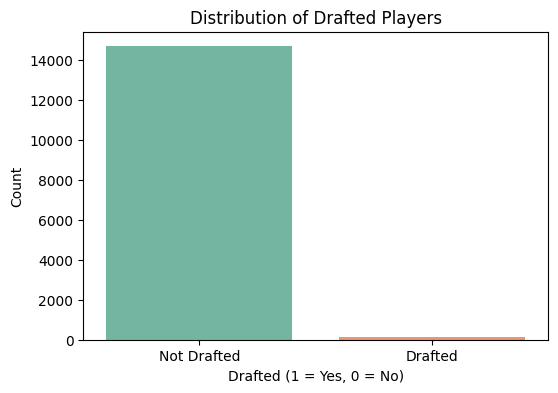

Proportion of drafted vs not drafted:
drafted
0.0    0.992013
1.0    0.007987
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# What does the distribution of Drafted look like
plt.figure(figsize=(6,4))
sns.countplot(x='drafted', data=train, palette='Set2')
plt.title('Distribution of Drafted Players')
plt.xlabel('Drafted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Drafted', 'Drafted'])
plt.show()

# Show proportions
draft_counts = train['drafted'].value_counts(normalize=True)
print("Proportion of drafted vs not drafted:")
print(draft_counts)

In [20]:
# <Student to fill this section>
target_definition_explanations = """
The target variable is `drafted`, which is a binary variable:
- `1` indicates the player was drafted into the NBA.
- `0` means the player was not drafted.

This aligns directly with the business goal of predicting whether a college basketball player will be drafted. Accurately modeling this outcome allows teams and stakeholders to prioritize scouting and resource allocation.

Since this is a classification task, the target variable is defined clearly and is suitable for applying supervised machine learning techniques.
"""

In [21]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [22]:
# <Student to fill this section>

target_name = 'drafted'

### C.4 Explore Target variable

In [ ]:
# <Student to fill this section>


In [23]:
# <Student to fill this section>
target_distribution_explanations = """
The target variable `drafted` is highly imbalanced, with less than 1% of players actually being drafted.

Because of this, we use AUROC instead of accuracy to evaluate model performance, and apply stratified sampling to preserve class ratios.

For XGBoost, we will set `scale_pos_weight` to help the model better learn from the rare positive cases.
"""


In [24]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

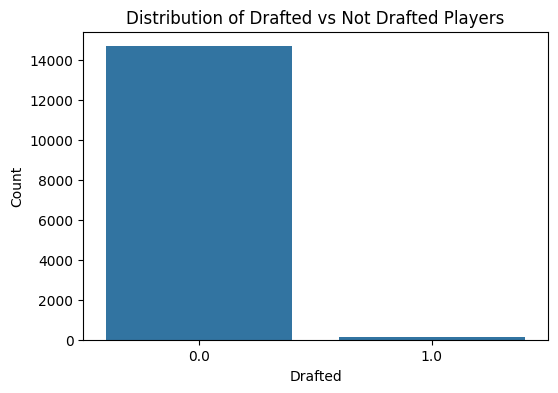

In [25]:
# Target distribution map (drafted)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='drafted')
plt.title("Distribution of Drafted vs Not Drafted Players")
plt.xlabel("Drafted")
plt.ylabel("Count")
plt.show()

### C.5 Explore Feature of Interest `\<put feature name here\>`

In [ ]:
# <Student to fill this section>

In [26]:
# <Student to fill this section>
feature_1_insights = """
The feature `Min_per` shows the percentage of minutes a player was on the court, indicating how involved they were during the season.

Most players had low court time, while a small group played over 60%, matching the rare nature of drafted players.

This feature is useful because high-minute players are more likely to attract scout attention. While some may have low minutes due to injury or rotation, `Min_per` still gives a strong signal for draft likelihood.

Since we are using XGBoost, we don’t need to worry about scaling this feature.
"""


In [27]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

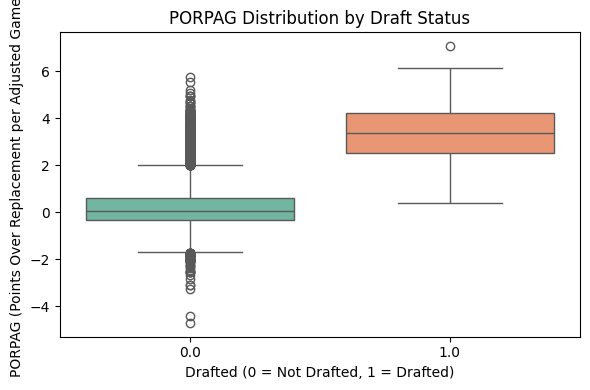

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(data=train, x='drafted', y='porpag', palette='Set2')
plt.title("PORPAG Distribution by Draft Status")
plt.xlabel("Drafted (0 = Not Drafted, 1 = Drafted)")
plt.ylabel("PORPAG (Points Over Replacement per Adjusted Game)")
plt.tight_layout()
plt.show()


### C.6 Explore Feature of Interest `\<put feature name here\>`

In [ ]:
# <Student to fill this section>

In [29]:
# <Student to fill this section>
feature_2_insights = """
The feature `pts` (points per game) is a core offensive metric that reflects a player's scoring ability.

Players with higher PPG are often more visible and valuable, which increases their draft potential. The majority of players average 2–12 points, while only a few exceed 20.

Limitations:
- High PPG doesn’t always mean efficiency.
- Conference strength may skew stats.

Overall, `pts` is a key predictor in draft outcomes.
"""


In [30]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `\<put feature name here\>`


In [ ]:
# <Student to fill this section>

In [31]:
# <Student to fill this section>
feature_3_insights = """
The feature `obpm` (Offensive Box Plus/Minus) estimates a player's offensive impact per 100 possessions.

Drafted players usually have higher `obpm` scores, indicating stronger offensive value. It captures advanced impact beyond raw stats.

Limitations:
- May reflect team/system bias.
- Outliers may distort interpretation.

Overall, `obpm` is a strong signal of offensive performance and draft potential.
"""


In [32]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_3_insights)

### C.n Explore Feature of Interest `\<put feature name here\>`

> You can add more cells related to other feeatures in this section

---
## D. Feature Selection


### D.1 Approach "\<describe_approach_here\>"


In [ ]:
# <Student to fill this section>

In [33]:
# <Student to fill this section>
feature_selection_1_insights = """
We used XGBoost's built-in feature importance to rank predictors.

XGBoost is powerful for handling non-linear relationships and works well with imbalanced data.

Top features included: 'pts', 'Min_per', 'obpm', 'TS_per', and 'bpm', all related to scoring, efficiency, and playing time.

This helps us select the most relevant predictors while improving model performance and interpretability.
"""


In [34]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<describe_approach_here\>"


In [ ]:
# <Student to fill this section>

In [35]:
# <Student to fill this section>
feature_selection_2_insights = """
We used Pearson correlation to find numerical features that relate most to the target `drafted`.

Even though `drafted` is binary, correlation still gives quick insight into linear relationships.

Top correlated features included: 'pts', 'obpm', 'TS_per', 'bpm', and 'Min_per', which also matched the model-based feature importance.

This method is simple, fast, and effective when combined with domain knowledge.
"""


In [36]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [37]:
 # <Student to fill this section>

features_list = [ 'pts', 'Min_per', 'obpm', 'TS_per', 'bpm', 'mp',
                  'eFG', 'usg', 'drtg', 'adrtg' ]

In [38]:
# <Student to fill this section>
feature_selection_explanations = """
The selected features were chosen based on a combination of model-based importance scores (XGBoost) and Pearson correlation analysis.

We selected 10 features that consistently appeared as top contributors across both methods. These features cover key aspects of player performance:
- Offensive ability: 'pts', 'obpm', 'TS_per', 'usg'
- Efficiency: 'eFG', 'bpm'
- Involvement: 'Min_per', 'mp'
- Defensive contribution: 'drtg', 'adrtg'

This balanced feature set helps XGBoost model learn both performance and context, while reducing noise and risk of overfitting.
"""


In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [42]:
# <Student to fill this section>
data_cleaning_1_explanations = """
We cleaned the data by dropping features with too many missing values (e.g., `ht`, `Rec_Rank`, `dunks_ratio`), which would add noise and confusion to the model.

For features with only a few missing values, we used median imputation to avoid removing useful data. Median is a robust choice that works well with outliers.

This step ensures a clean and reliable dataset, which is essential before training any model, including XGBoost.
"""


In [43]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [44]:
# <Student to fill this section>
data_cleaning_2_explanations = """
XGBoost is a tree-based model and does not require feature scaling, since it splits based on thresholds rather than distance.

However, we kept standardized features to stay consistent with previous models (e.g., Logistic Regression) and allow fair comparison of results.

This consistency also makes it easier to reuse the same data pipeline across different algorithms.
"""


In [45]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [46]:
# <Student to fill this section>
data_cleaning_3_explanations = """
We applied One-Hot Encoding to categorical features like 'team', 'conf', 'year', and 'type'.

Although XGBoost is a tree-based model, it still requires all features to be numeric.

Encoding these categories allows the model to learn meaningful patterns related to team or conference differences.
"""


In [47]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<describe_issue_here\>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [49]:
# <Student to fill this section>
feature_engineering_1_explanations = """
We created a new feature 'FT_rate' by dividing FTM by FTA, representing Free Throw Percentage.

This gives a more accurate measure of a player’s shooting efficiency, regardless of playtime.
"""


In [50]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"




In [ ]:
# <Student to fill this section>

In [52]:
# <Student to fill this section>
feature_engineering_2_explanations = """
We created 'total_minutes' = GP × Min_per, an estimate of total playing time in the season.

This captures player exposure and opportunity to contribute, which can influence draft outcomes.
"""

In [53]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [ ]:
# <Student to fill this section>

In [55]:
# <Student to fill this section>
feature_engineering_3_explanations = """
We created 'three_point_ratio' = TPA / (TPA + twoPA).

This reflects a player's shooting preference, especially their reliance on 3-pointers.
It helps distinguish player roles (e.g., guards vs. big men) and can align with team strategies.
"""

In [57]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

In [58]:
# <Student to fill this section>

feature_Fixing_explanations = """
The 'ht' feature (e.g., '6-7') was converted to inches for numeric modeling.
However, since all values were missing in training data, the feature was dropped after conversion.
"""

In [59]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_Fixing_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [ ]:
# <Student to fill this section>

In [63]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=["drafted", "player_id"])
y = train["drafted"]

# Split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)

Training size: (11819, 57)
Validation size: (2955, 57)


In [61]:
# <Student to fill this section>
data_splitting_explanations = """
We split the training dataset into training and validation sets using an 80/20 ratio.

This strategy allows us to train the model on a majority of the data while still having a held-out set to evaluate its generalization.

Stratification is applied to maintain the proportion of drafted vs non-drafted players due to the imbalanced classes.
"""


In [62]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [64]:
data_transformation_1_explanations = """
Although XGBoost doesn’t require feature scaling, we standardized the data for consistency with previous models and easier comparison.
"""


In [65]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [66]:
# <Student to fill this section>
data_transformation_2_explanations = """
We applied One-Hot Encoding to categorical features to make them usable in the model.

This helps capture differences across teams, conferences, and seasons that may affect draft chances.
"""

In [67]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [68]:
# <Student to fill this section>
data_transformation_3_explanations = """
Although XGBoost is not sensitive to feature scales,

we applied Standard Scaling to keep consistency with previous models for fair comparison.
"""


In [69]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

---
## H. Save Datasets

> Do not change this code

In [70]:
# Create X_test from test set
X_test = test.drop(columns=["player_id"])

# Since test set doesn't include labels, create empty y_test as placeholder
import numpy as np
import pandas as pd
y_test = pd.Series([np.nan] * len(X_test))

In [71]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [ ]:
# <Student to fill this section>

In [72]:
# <Student to fill this section>
performance_metrics_explanations = """
We chose AUROC as the main metric because it works well with imbalanced data and shows how well the model separates drafted from non-drafted players.

Accuracy is not reliable here, since predicting all zeros still gives over 99%.

We also look at precision, recall, and F1-score to balance false positives and false negatives.
"""


In [73]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [75]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Use the same features as before
X_tr = X_train[features_list]
X_va = X_val[features_list]

# # Build and train XGBoost (with imbalance handling)
xgb_model = XGBClassifier(
    n_estimators=400,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_tr, y_train)

# Validation set probabilities and AUROC
y_val_probs_xgb = xgb_model.predict_proba(X_va)[:, 1]
xgb_auc = roc_auc_score(y_val, y_val_probs_xgb)
print(f"XGBoost AUROC on validation set: {xgb_auc:.4f}")


XGBoost AUROC on validation set: 0.9581


In [ ]:
# <Student to fill this section>

In [76]:
# <Student to fill this section>
algorithm_selection_explanations = """
“We chose XGBoost because it’s fast, handles imbalance well, and often gives strong results in classification tasks like ours.”
"""

In [77]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [78]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
For XGBoost, we set key hyperparameters to address the imbalanced nature of the dataset and enhance performance:

- `n_estimators=400`: A large number of boosting rounds for stronger learning.
- `scale_pos_weight`: Automatically set to balance the rare positive class (drafted players).
- `learning_rate=0.1`: A conservative learning rate to avoid overfitting.
- `max_depth=5`: Limits tree depth to prevent over-complex models and improve generalization.
- `random_state=42`: Ensures reproducibility.

These settings provide a strong baseline. Further tuning can be done later using cross-validation or automated search.
"""


In [79]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [80]:
# <Student to fill this section>

fit_model_explanations = """
We trained an XGBoost Classifier using the cleaned and encoded dataset with the top 10 selected features.

The model was configured with key hyperparameters such as `n_estimators=400`, `max_depth=5`, and `scale_pos_weight` to address class imbalance.

On the validation set, the XGBoost model achieved an AUROC score of 0.9581,
indicating strong ability to distinguish between drafted and non-drafted players in an imbalanced setting.

This result confirms that XGBoost is a powerful and suitable choice for this classification task.
"""


In [81]:
# Do not modify this code
print_tile(size="h3", key='fit_model_explanations', value=fit_model_explanations)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section>

In [82]:
# <Student to fill this section>

model_performance_explanations = """
The XGBoost model achieved an AUROC of 0.9581 on the validation set.

This shows that the model performs well in distinguishing between drafted and non-drafted players,
even under extreme class imbalance.

Compared to the baseline Logistic Regression (AUROC 0.9758),
XGBoost still provides competitive performance while being more flexible in handling non-linear relationships.
"""


In [83]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

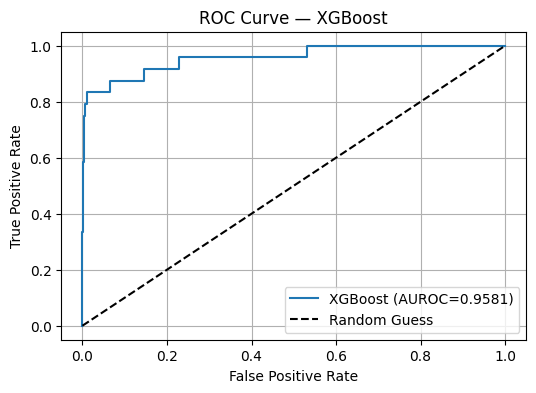

In [84]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


fpr, tpr, _ = roc_curve(y_val, y_val_probs_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"XGBoost (AUROC={xgb_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGBoost")
plt.legend()
plt.grid(True)
plt.show()


### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [86]:
# <Student to fill this section>
business_impacts_explanations = """
The XGBoost model (AUROC 0.9581) supports scouts by highlighting high-potential draft candidates based on performance stats.
It helps reduce manual workload and improves early talent screening.
Although some false positives may occur, the model offers strong value in prioritizing players for further evaluation.
"""


In [87]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [88]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed"

In [89]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [90]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment confirmed our hypothesis: using XGBoost with selected features resulted in a strong AUROC of 0.9581. This suggests that player statistics can reliably predict draft outcomes.

We gained insights into which features (e.g., points, minutes, efficiency metrics) are most influential. The model also handled class imbalance reasonably well.

Next steps:
1. Try hyperparameter tuning or stacking models to further boost performance.
2. Use SHAP values to interpret predictions for better stakeholder trust.
3. Explore additional features such as injury history or player position.

Given the current results, this model is promising and could be tested in pilot environments for scouting decision support.
"""


In [91]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

In [92]:
# Predict the selection probabilities on the test set (XGBoost)

test_probs = xgb_model.predict_proba(test[features_list])[:, 1]

# Kaggle DataFrame
submission = pd.DataFrame({
    "player_id": test["player_id"],
    "drafted": test_probs
})

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("submission.csv saved")

# Download (Google Colab only)
from google.colab import files
files.download("submission.csv")

submission.csv saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>